In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    #  transforms.Lambda(lambda x: x.repeat(1,1,1)),
     transforms.Normalize((0.5), (0.5))])

batch_size =  32

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,download=True, transform=transform)  

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,drop_last=True,shuffle=True, num_workers=2)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
print(trainset.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
print(trainset.data.shape);
print(trainset.targets.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


In [ ]:
print(testset.data.shape)
print(testset.targets.shape)

torch.Size([10000, 28, 28])
torch.Size([10000])


In [ ]:
images, labels = next(iter(testloader))

In [ ]:
print(images.shape)
print(labels.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# **Glance at the Data**

In [ ]:
def imshow(inp, title=None):
  inp = inp.numpy().transpose((1,2,0))
  mean = np.array([0.485,0.456,0.406])
  std = np.array([0.229,0.224,0.225])
  inp = np.clip(inp, 0, 1)
  plt.imshow(inp)
  if title is not None:
    plt.title(title)
  plt.pause(0.001)

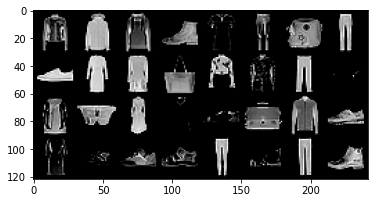

In [ ]:
out = torchvision.utils.make_grid(images)
imshow(out)

# **This part we follow the structure of picture**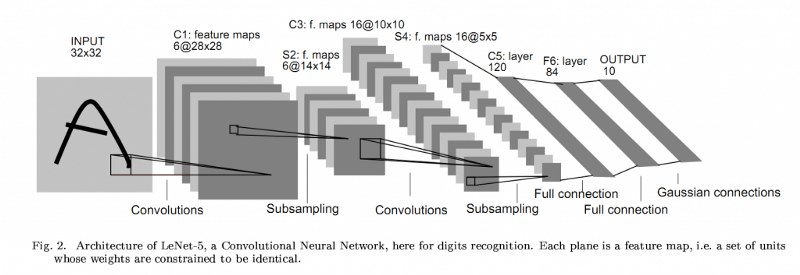

In [3]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, 1, 2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = torch.dropout(x, 0.2 , train=True)
        return x


net = Net()

In [ ]:
print(enumerate(trainloader,0))

In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# **Train the Model and get loss**

In [5]:
acc_cnn=[]
for epoch in range(10):  # loop over the dataset multiple times
    train_accs=[]
    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        # get the inputs; data is a list of [inputs, labels]
        # print('shape',inputs.shape)
        inputs, labels = data
        # print('shape',inputs.shape)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        acc=(outputs.argmax(dim=-1)==labels).float().mean() #paint  The y-axis is the test (validation) accuracy and  the x-axis is the number of epochs
        train_accs.append(acc)                                                                
        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0
    train_acc=sum(train_accs)/len(train_accs)
    acc_cnn.append(train_acc.cpu().item())
print('Finished Training')

[1,   200] loss: 2.300
[1,   400] loss: 2.278
[1,   600] loss: 2.009
[1,   800] loss: 1.252
[1,  1000] loss: 1.070
[1,  1200] loss: 1.008
[1,  1400] loss: 0.934
[1,  1600] loss: 0.901
[1,  1800] loss: 0.896
[2,   200] loss: 0.826
[2,   400] loss: 0.842
[2,   600] loss: 0.844
[2,   800] loss: 0.832
[2,  1000] loss: 0.792
[2,  1200] loss: 0.795
[2,  1400] loss: 0.787
[2,  1600] loss: 0.736
[2,  1800] loss: 0.731
[3,   200] loss: 0.721
[3,   400] loss: 0.722
[3,   600] loss: 0.729
[3,   800] loss: 0.725
[3,  1000] loss: 0.680
[3,  1200] loss: 0.691
[3,  1400] loss: 0.704
[3,  1600] loss: 0.689
[3,  1800] loss: 0.679
[4,   200] loss: 0.689
[4,   400] loss: 0.665
[4,   600] loss: 0.656
[4,   800] loss: 0.660
[4,  1000] loss: 0.650
[4,  1200] loss: 0.651
[4,  1400] loss: 0.653
[4,  1600] loss: 0.655
[4,  1800] loss: 0.625
[5,   200] loss: 0.612
[5,   400] loss: 0.645
[5,   600] loss: 0.615
[5,   800] loss: 0.615
[5,  1000] loss: 0.610
[5,  1200] loss: 0.604
[5,  1400] loss: 0.606
[5,  1600] 

In [77]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
loss_list1 = [0.866, 0.730, 0.652, 0.634, 0.572, 0.566, 0.558, 0.531, 0.521, 0.508]
epochlist = [1,2,3,4,5,6,7,8,9,10]

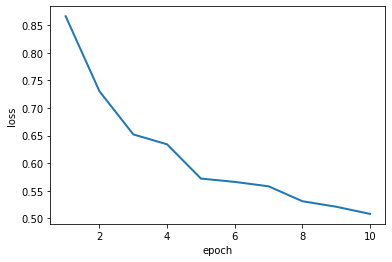

In [86]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(epochlist,loss_list1,linewidth = 2)

In [ ]:
acc_cnn4 = acc_cnn
print(acc_cnn4)

[0.5043833255767822, 0.6961166858673096, 0.7318833470344543, 0.7468500137329102, 0.7591000199317932, 0.7655333280563354, 0.7699999809265137, 0.7765166759490967, 0.7819166779518127, 0.7820500135421753]


In [8]:
PATH = './Fansionmnist_net.pth'
torch.save(net.state_dict(), PATH)

# **Use following code to cosider Accuracy of each class in testdataset**

In [12]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    # iter = 0#后加
    # correct =0.0 #Hou加
    for data in testloader:     
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
    # for images, labels in testloader:
    #     total = 0 # 后加 
    #     iter += 1
    #     total += labels.size(0)
    #     correct += (predictions == labels).sum()
    #     Accu = correct/total *100
    # print(f'Accu : {Accu}')

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: T-shirt/top is 78.3 %
Accuracy for class: Trouser is 91.9 %
Accuracy for class: Pullover is 74.6 %
Accuracy for class: Dress is 81.9 %
Accuracy for class: Coat  is 62.5 %
Accuracy for class: Sandal is 81.2 %
Accuracy for class: Shirt is 60.3 %
Accuracy for class: Sneaker is 81.6 %
Accuracy for class: Bag   is 79.7 %
Accuracy for class: Ankle boot is 77.5 %


In [ ]:
if iter % 500 ==0:
      # model.eval()
      correct = 0
      total = 0
      for images, lable  in testloader:
        images = images.view(-1, sequence_dim, input_dim).to(device)
        
        output = model(images)

        predict = torch.max(outputs.data,1)[1]

        total += labels.size(0)
        # if torch.cuda.is_available():
        #   correct += (predict.gpu()==labels).sum
        # else:
        correct += (predict == labels).sum()
      accuracy = correct/total *100

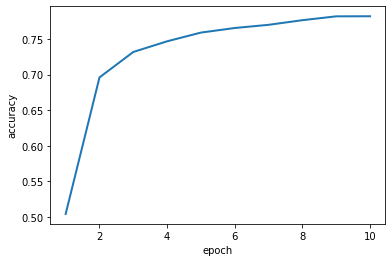

In [88]:
plt.xlabel("epoch")
plt.ylabel("accuracy")
acc_cnn4 = [0.5043833255767822, 0.6961166858673096, 0.7318833470344543, 0.7468500137329102, 0.7591000199317932, 0.7655333280563354, 0.7699999809265137, 0.7765166759490967, 0.7819166779518127, 0.7820500135421753]
plt.plot(epochlist,acc_cnn4,linewidth = 2)

# **Then consider the RNN method and compare the result of CNN with of RNN**

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

In [102]:
from torch._C import device
class RNN_Model(nn.Module):
  def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
    super(RNN_Model, self).__init__()
    self.hidden_dim = hidden_dim
    # print('bbbbbbb')
    self.layer_dim = layer_dim
    # print('aaaaaaa')
    self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim)#, nonlinearity='relu'
    # print('ccccccc')
    self.fc = nn.Linear(hidden_dim, output_dim)
  
  def forward(self, x):
    #print(f'x.size(0):{x.size(0)}')
    h0 = torch.zeros(self.layer_dim, x.size(1), self.hidden_dim).requires_grad_().to(device)
    #print(f'forward x.shape:{x.shape}')
    #print(f'forward h0:{h0.shape}')
    out, hn = self.rnn(x, h0.detach())  # avoid to 梯度爆炸
    #print(f'out.shape: {out.shape}')
    out = self.fc(out[:, -1, :]) 
    #print(f'out.shape:{out.shape}')
    return out



In [103]:
input_dim = 28
hidden_dim = 64
layer_dim = 2
output_dim = 10

model = RNN_Model(input_dim, hidden_dim, layer_dim, output_dim)
device = torch.device('cuda:0' if torch.cuda.is_available()else'cpu')

length = len(list(model.parameters()))

for i in range(length):
  print('parameter');
  print(list(model.parameters())[i].size())


import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
print(len(trainloader))

parameter
torch.Size([64, 28])
parameter
torch.Size([64, 64])
parameter
torch.Size([64])
parameter
torch.Size([64])
parameter
torch.Size([64, 64])
parameter
torch.Size([64, 64])
parameter
torch.Size([64])
parameter
torch.Size([64])
parameter
torch.Size([10, 64])
parameter
torch.Size([10])
1875


In [104]:
sequence_dim = 28
acc_rnn = []
loss_list = []
iteration_list = []
train_accs = []
running_loss = []
# batch_size = 32
running_loss = 0.0
iter = 0
for epoch in range(10):
  for i, (images,labels) in enumerate(trainloader):
    #print(f'images.shape at train:{images.shape}')
    optimizer.zero_grad()
    model.train=()
    images = images.view(-1, sequence_dim, input_dim)#.requires_grad_().to(device)
    #print(f'images.shape after reshape:{images.shape}')
    labels = labels.to(device)
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()

    optimizer.step()

    acc=(outputs.argmax(dim=-1)==labels).float().mean() 
    
    train_accs.append(acc)
    loss_list.append(loss.data)
    iteration_list.append(i)                                                                 
        # print statistics
    running_loss += loss.item()
    if i % 200 == 199:    
        print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 199:.3f}')
        running_loss = 0.0
    train_acc=sum(train_accs)/len(train_accs)
    acc_rnn.append(train_acc.cpu().item())
print('Finished Training')
     

[1,   200] loss: 2.329
[1,   400] loss: 2.319
[1,   600] loss: 2.309
[1,   800] loss: 2.300
[1,  1000] loss: 2.293
[1,  1200] loss: 2.288
[1,  1400] loss: 2.280
[1,  1600] loss: 2.275
[1,  1800] loss: 2.267
[2,   200] loss: 3.107
[2,   400] loss: 2.251
[2,   600] loss: 2.244
[2,   800] loss: 2.236
[2,  1000] loss: 2.228
[2,  1200] loss: 2.221
[2,  1400] loss: 2.211
[2,  1600] loss: 2.201
[2,  1800] loss: 2.195
[3,   200] loss: 3.002
[3,   400] loss: 2.170
[3,   600] loss: 2.164
[3,   800] loss: 2.156
[3,  1000] loss: 2.142
[3,  1200] loss: 2.131
[3,  1400] loss: 2.124
[3,  1600] loss: 2.116
[3,  1800] loss: 2.103
[4,   200] loss: 2.878
[4,   400] loss: 2.084
[4,   600] loss: 2.070
[4,   800] loss: 2.066
[4,  1000] loss: 2.056
[4,  1200] loss: 2.054
[4,  1400] loss: 2.046
[4,  1600] loss: 2.043
[4,  1800] loss: 2.028
[5,   200] loss: 2.778
[5,   400] loss: 2.022
[5,   600] loss: 2.013
[5,   800] loss: 1.999
[5,  1000] loss: 1.991
[5,  1200] loss: 1.986
[5,  1400] loss: 1.989
[5,  1600] 

In [106]:
acc_rnn = acc_rnn
print(acc_rnn)

[0.15625, 0.09375, 0.0833333358168602, 0.0625, 0.08749999850988388, 0.0833333358168602, 0.0892857164144516, 0.0859375, 0.0833333358168602, 0.09375, 0.09943182021379471, 0.09375, 0.09134615212678909, 0.0959821417927742, 0.10000000149011612, 0.1015625, 0.0992647036910057, 0.0954861119389534, 0.09210526198148727, 0.09062500298023224, 0.092261902987957, 0.09232954680919647, 0.08967391401529312, 0.09375, 0.0949999988079071, 0.09615384787321091, 0.0972222238779068, 0.0982142835855484, 0.09913793206214905, 0.09791667014360428, 0.09778226166963577, 0.095703125, 0.09375, 0.09283088147640228, 0.09285714477300644, 0.0928819477558136, 0.09375, 0.09292763471603394, 0.09294871985912323, 0.09687499701976776, 0.09756097197532654, 0.0982142835855484, 0.09738372266292572, 0.09659090638160706, 0.09513889253139496, 0.09578804671764374, 0.09640957415103912, 0.0944010391831398, 0.09438775479793549, 0.09375, 0.09558823704719543, 0.09555288404226303, 0.09610848873853683, 0.09664351493120193, 0.100568182766437

In [58]:
PATH = './Fansion_model.pth'
torch.save(model.state_dict(), PATH)

In [120]:
acc_rnn1=[]
for i in range(10):
  index = (len(acc_rnn)/10)
  acc_rnn1.append(acc_rnn[int(index)*i])

print(acc_rnn1)
  


[0.15625, 0.16156382858753204, 0.20969408750534058, 0.23751889169216156, 0.25699907541275024, 0.272487610578537, 0.2854718565940857, 0.2961345911026001, 0.3049505054950714, 0.31219446659088135]


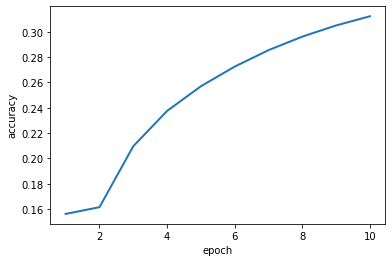

In [121]:
epochlist = [1,2,3,4,5,6,7,8,9,10]
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(epochlist,acc_rnn1,linewidth = 2)

In [124]:
itera = range(1,91)

In [123]:
lost_rnn=[2.329,2.319,2.309,2.300,2.293,2.288,2.280,2.275,2.267,3.107,2.251,2.244,2.236,2.228,2.221,2.211,2.201,2.195,3.002,2.170,2.164,2.156,2.142,2.131,2.124,2.116,2.103,2.878,2.084,2.070,2.066,2.056,2.054,2.046,2.043,2.028,2.778,2.022,2.013,1.999,1.991,1.986,1.989,1.978,1.972,2.695,1.957,1.949,1.947,1.931,1.938,1.938,1.938,1.904,2.625,1.907,1.898,1.885,1.891,1.879,1.873,1.864,1.863,2.561,1.837,1.847,1.835,1.822,1.828,1.812,1.816,1.819,2.478,1.801,1.800,1.766,1.789,1.767,1.761,1.756,1.745,2.401,1.747,1.736,1.741,1.725,1.734,1.718,1.724,1.708]

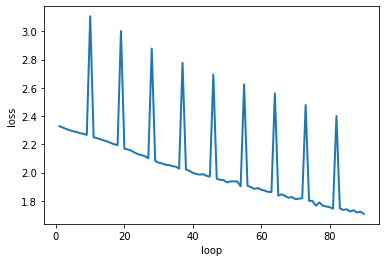

In [126]:
plt.xlabel("loop")
plt.ylabel("loss")
plt.plot(itera,lost_rnn,linewidth = 2)

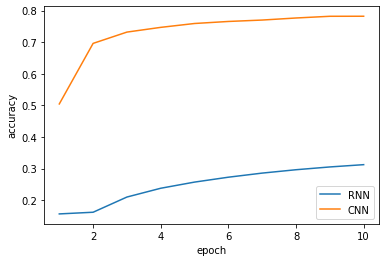

In [133]:
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(epochlist,acc_rnn1,label='RNN')#linewidth = 2,
plt.plot(epochlist,acc_cnn4,label='CNN')
plt.legend()#linewidth = 2